In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Cleaning and Preproccesing

In [2]:
ames_data = pd.read_csv("ames.csv")

In [3]:
ames_data.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
ames_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [5]:
ames_data.isnull().sum()

Order               0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [6]:
#drop cols with more than 50% missing data and impute missing values for other cols
threshold = len(ames_data) * 0.5
ames_data = ames_data.dropna(thresh=threshold, axis=1)

for col in ames_data.select_dtypes(include=['float', 'int']):  #numerical cols
    ames_data[col] = ames_data[col].fillna(ames_data[col].median())

for col in ames_data.select_dtypes(include=['object']): #categorical cols
    ames_data[col] = ames_data[col].fillna(ames_data[col].mode()[0])

In [7]:
print(ames_data.isnull().sum())

Order             0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64


In [14]:
import plotly.express as px

px.histogram(ames_data, x = 'Year Built')

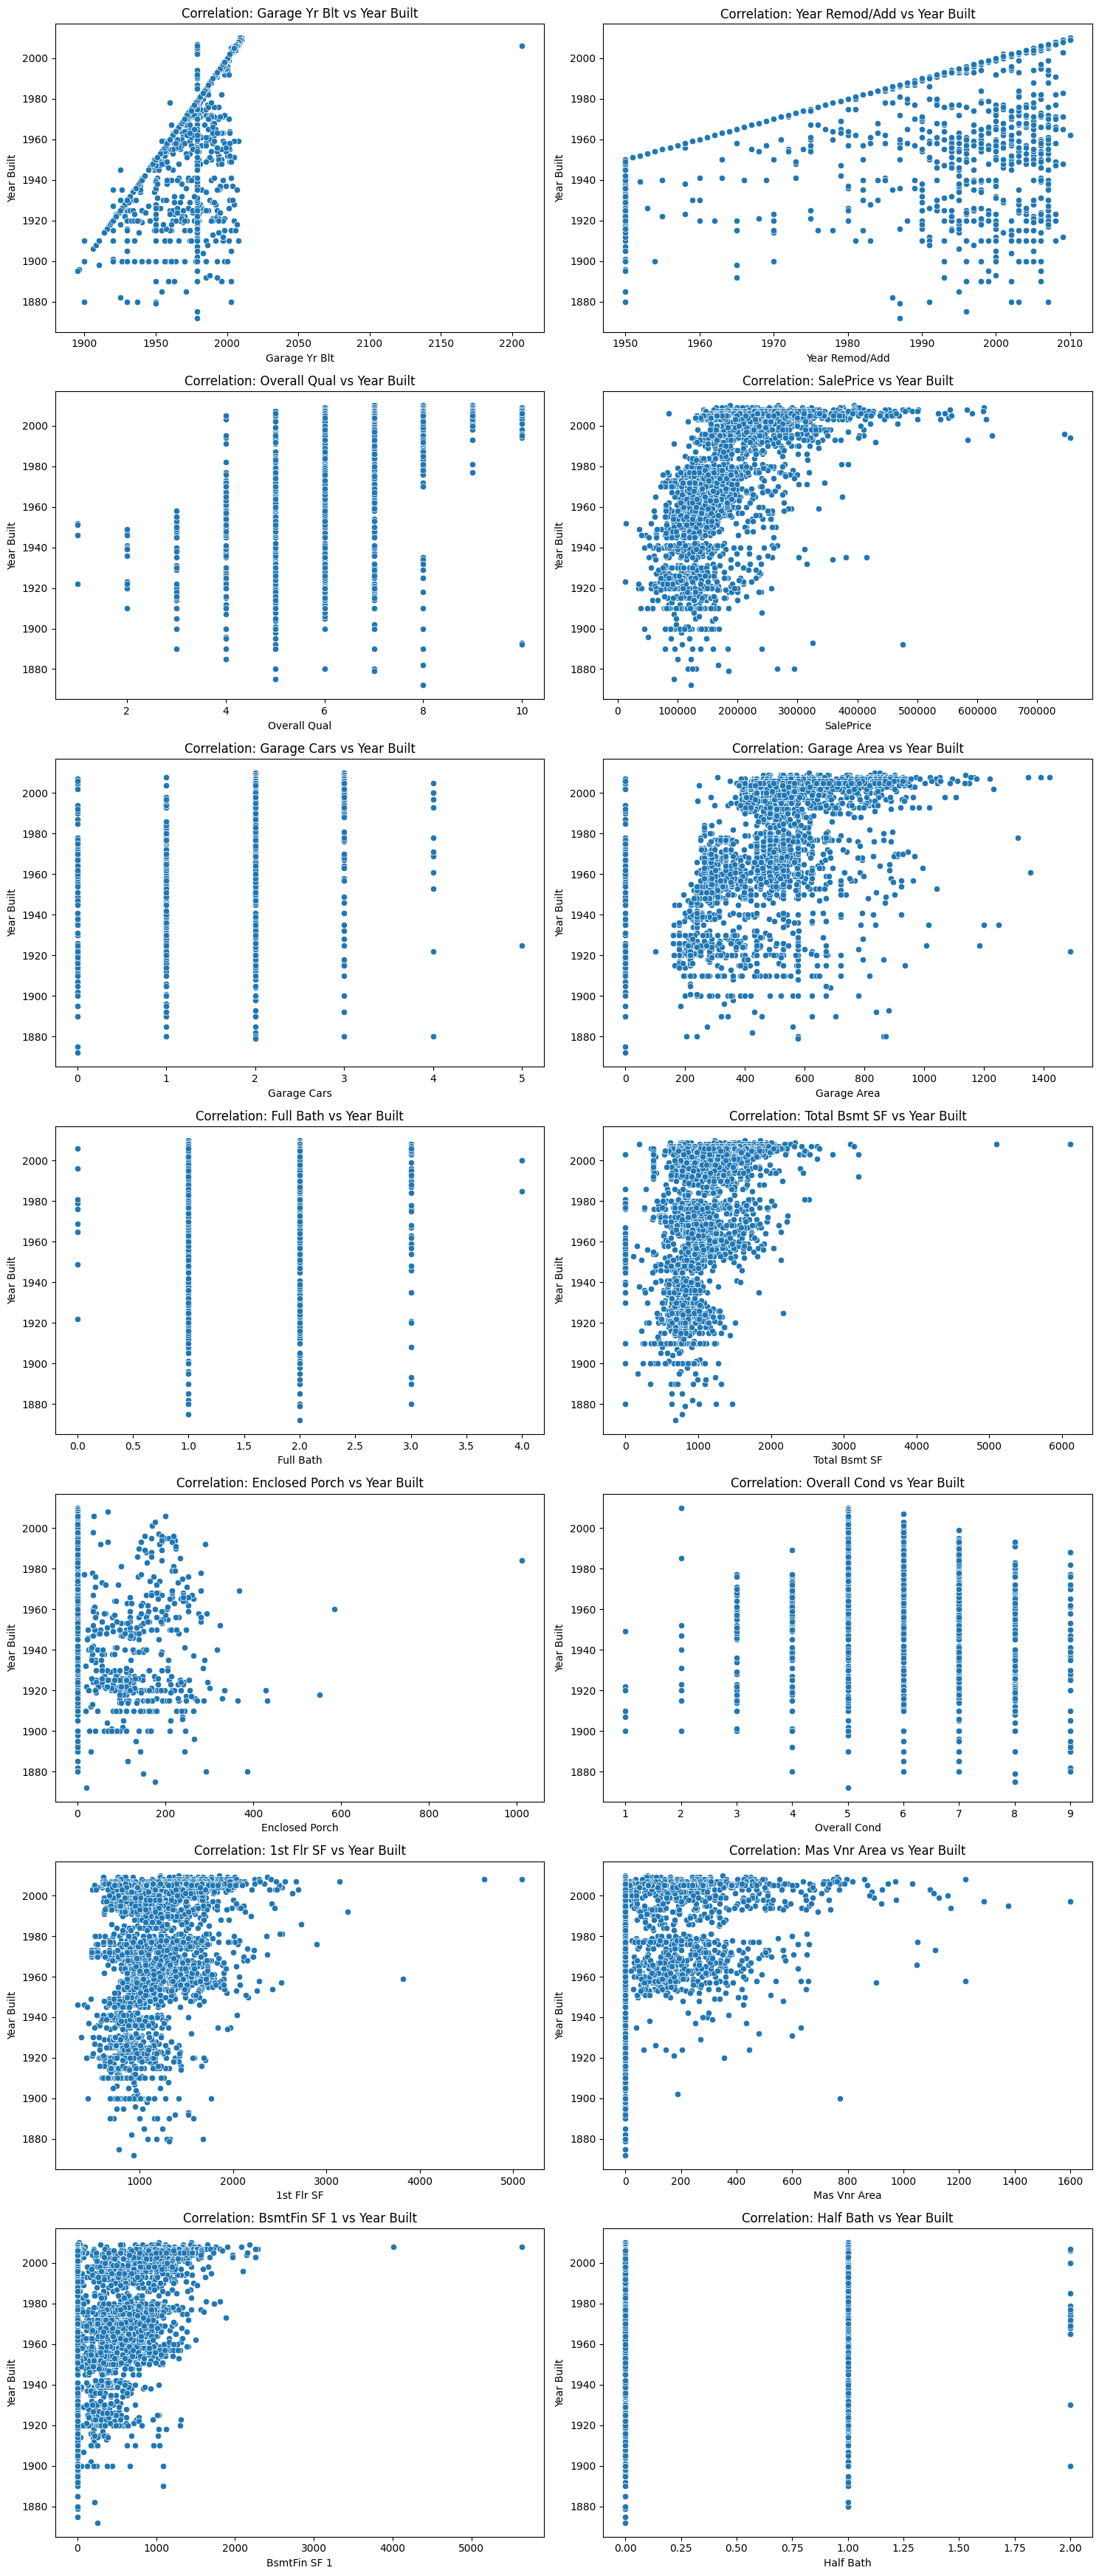

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_top_correlations(data, target_variable, top_n=10):
    """
    Plot scatter plots for the top N features most correlated with the target variable.
    """
    numeric_data = data.select_dtypes(include=["int64", "float64"])
    corr_matrix = numeric_data.corr()

    correlations = corr_matrix[target_variable].drop(target_variable)
    correlations = correlations.abs().sort_values(ascending=False)

    top_variables = correlations.head(top_n).index

    num_rows = (top_n + 1) // 2  
    plt.figure(figsize=(15, num_rows * 5))
    for i, column in enumerate(top_variables):
        plt.subplot(num_rows, 2, i + 1)  
        sns.scatterplot(data=numeric_data, x=column, y=target_variable)
        plt.title(f"Correlation: {column} vs {target_variable}")
        plt.xlabel(column)
        plt.ylabel(target_variable)

    plt.tight_layout()
    plt.show()
    
plot_top_correlations(ames_data, 'Year Built', 14)

### Data splitting 

In [10]:
independent_variables = ["Year Remod/Add", "Overall Qual", "SalePrice", "Garage Cars", "Full Bath", "Total Bsmt SF", "Enclosed Porch"]
target_variable = "Year Built"

X = ames_data[independent_variables]
y = ames_data[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data scaling

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Baseline model (Linear Regression)

In [12]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression MSE: 321.9018595196946
Linear Regression R² Score: 0.6329829906893827


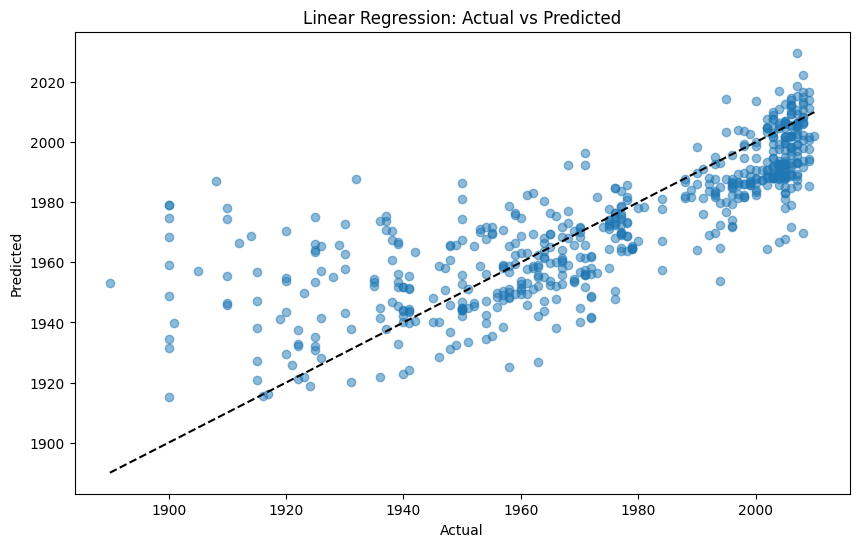

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()


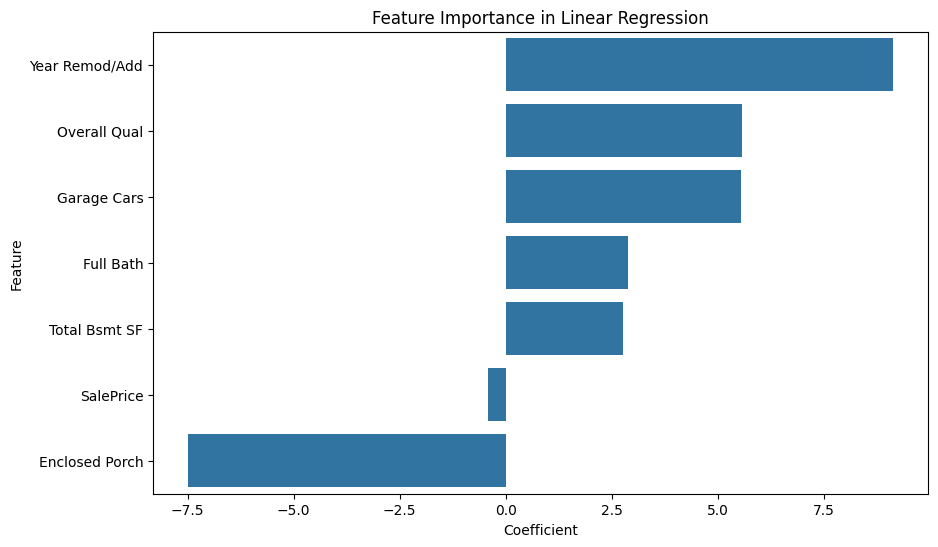

In [15]:
# Feature importance for Linear Regression
lr_coef = pd.DataFrame({'Feature': independent_variables, 'Coefficient': lr.coef_})
lr_coef = lr_coef.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=lr_coef, x='Coefficient', y='Feature')
plt.title('Feature Importance in Linear Regression')
plt.show()

### Building complex models

#### Decision Tree

Decision Tree MSE: 389.40443686006824
Decision Tree R² Score: 0.5560198004388248


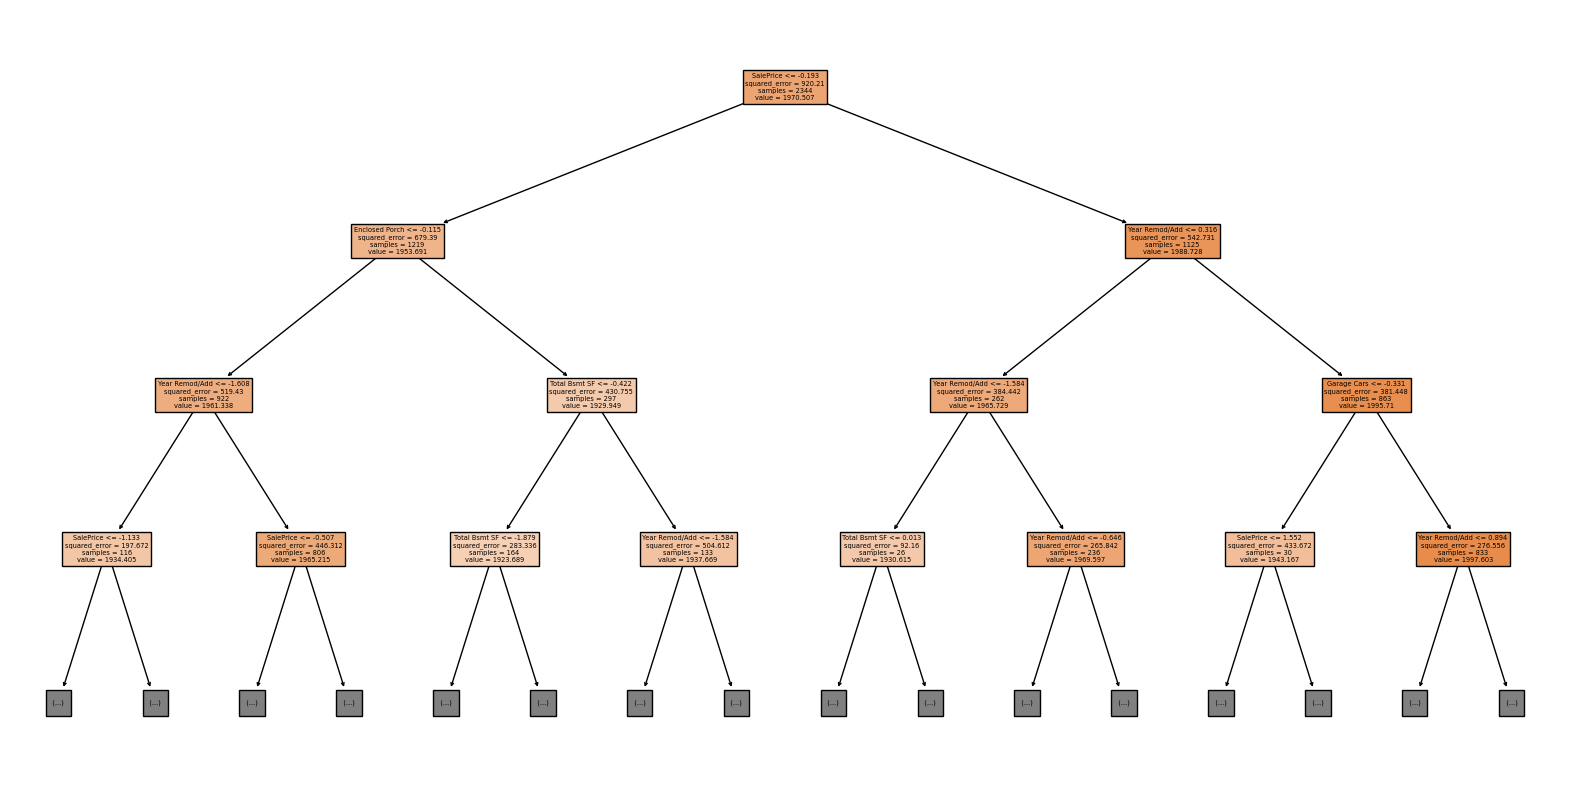

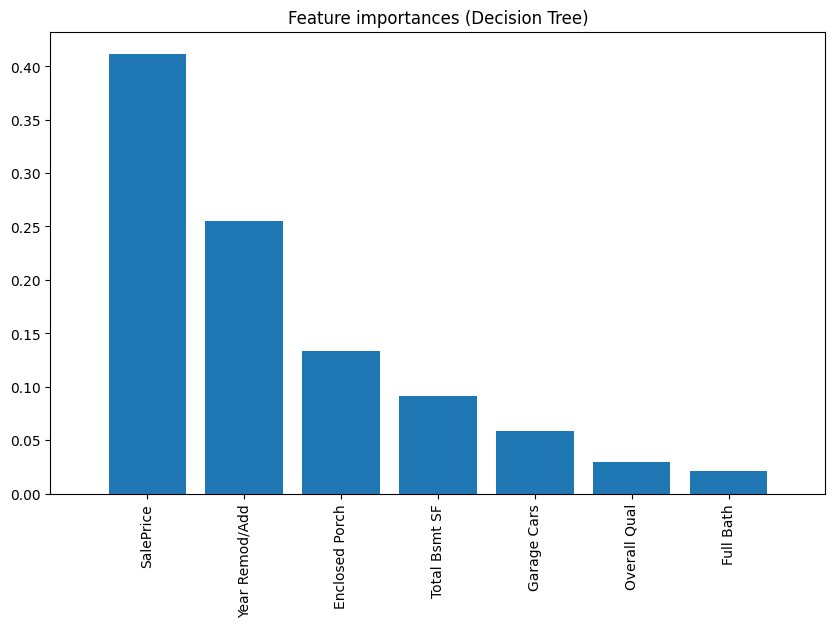

In [16]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=independent_variables, max_depth=3) 
plt.show()

importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances (Decision Tree)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [independent_variables[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### Random Forest

Random Forest MSE: 187.44499095563137
Random Forest R² Score: 0.7862842417454798


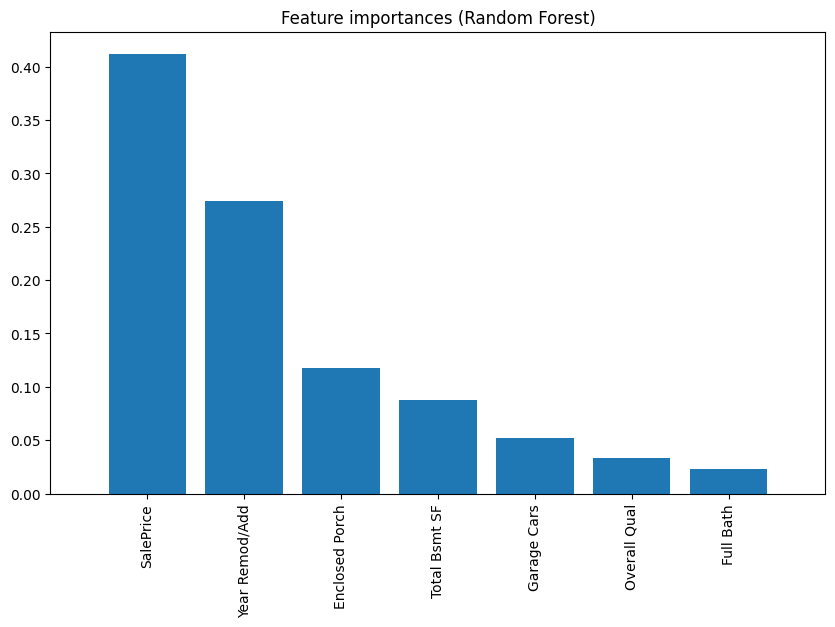

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [independent_variables[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


#### Gradient Boosting

Gradient Boosting MSE: 195.52627570839698
Gradient Boosting R² Score: 0.7770703497668097


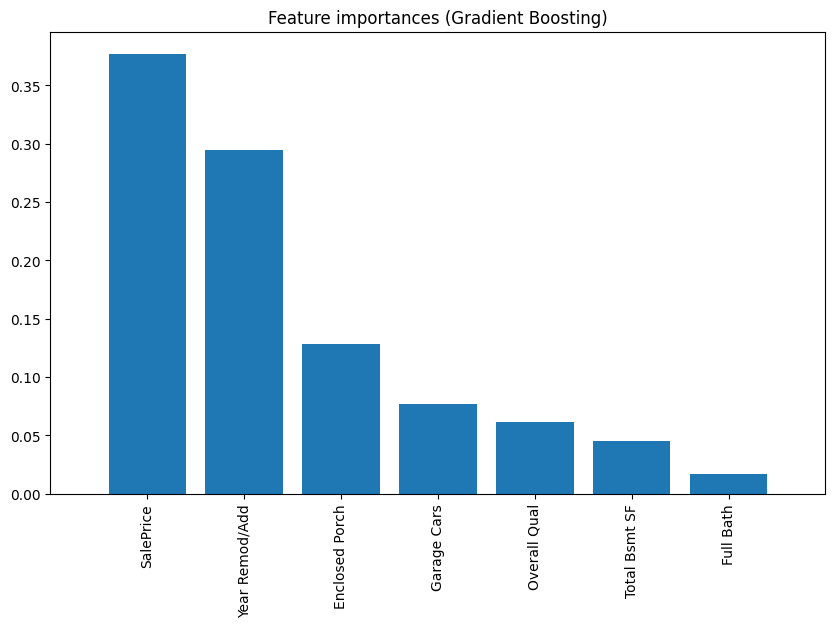

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred_gb = gb.predict(X_test_scaled)
print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred_gb))
print("Gradient Boosting R² Score:", r2_score(y_test, y_pred_gb))

importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances (Gradient Boosting)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [independent_variables[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


#### Support Vector Machine

In [19]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test_scaled)
print("SVM MSE:", mean_squared_error(y_test, y_pred_svm))
print("SVM R² Score:", r2_score(y_test, y_pred_svm))

SVM MSE: 290.3490329991694
SVM R² Score: 0.6689580050684201


## Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

def perform_cross_validation(model, X, y, num_folds=5):
    scores = cross_val_score(model, X, y, cv=num_folds, scoring='r2')
    print(f"Average R² Score ({num_folds}-Fold): {np.mean(scores)}")

print("Linear Regression")
perform_cross_validation(lr, X_train_scaled, y_train)

print("Decision Tree")
perform_cross_validation(dt, X_train_scaled, y_train)

print("Random Forest")
perform_cross_validation(rf, X_train_scaled, y_train)

print("Gradient Boosting")
perform_cross_validation(gb, X_train_scaled, y_train)

print("SVM")
perform_cross_validation(svm, X_train_scaled, y_train)


Linear Regression
Average R² Score (5-Fold): 0.5374812407983173
Decision Tree
Average R² Score (5-Fold): 0.5628075082353056
Random Forest
Average R² Score (5-Fold): 0.7561574544628431
Gradient Boosting
Average R² Score (5-Fold): 0.7290556355045874
SVM
Average R² Score (5-Fold): 0.5981026688212998


#### Hyperparameter tuning on Random Forest

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

#### Residual Analysis

In [ ]:
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Actual for {model_name}')
    plt.show()

plot_residuals(y_test, y_pred_lr, 'Linear Regression')
plot_residuals(y_test, y_pred_dt, 'Decision Tree')
plot_residuals(y_test, y_pred_rf, 'Random Forest')
plot_residuals(y_test, y_pred_gb, 'Gradient Boosting')
plot_residuals(y_test, y_pred_svm, 'SVM')

## Findings

##### Model Performance:

Random Forest and Gradient Boosting have the best performance based on R² Score and MSE.
Linear Regression and SVM show moderate performance.
Decision Tree has the lowest performance, which is could be due to its tendency to overfit.

##### Cross-Validation Scores:

The cross-validation scores are slightly lower than the test scores which is normal. This suggests our models are not overfitting significantly.
Random Forest and Gradient Boosting consistently show strong performance, reinforcing their robustness.

##### Hyperparameter Tuning:

For Random Forest, the best parameters (max_depth: 20, n_estimators: 300) indicate a preference for a more complex model, which makes sense given the dataset's complexity.

##### Residual Analysis 

Residuals do not have constant variance(not homoscedastic) for all of our models. This suggests a systematic bias in model predictions - underestimating the year built for older 
houses and overestimating it for new ones. 

To address this we can try: 
- Non-Linear Relationships: including polynomial terms to capture non-linear relationships
- Feature Engineering: revisit feature selection and engineering process
- Data quality/ removing outliers
- Try more complex models to see if they can capture underlying patterns in the data
- Use temporal features eg create a feature that represents the age of a house at time of sale
- Residual analysis over time 
- Model diagnostics: check for multicollinearity, overfitting, violation of model assumptions


TO-DO
- evalate efficiency of each model - time taken, resource consumption?? 






#### Adding polynomial features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

rf_poly = RandomForestRegressor(random_state=42)
rf_poly.fit(X_train_poly_scaled, y_train_poly)

y_pred_rf_poly = rf_poly.predict(X_test_poly_scaled)
print("Random Forest with Polynomial Features MSE:", mean_squared_error(y_test_poly, y_pred_rf_poly))
print("Random Forest with Polynomial Features R² Score:", r2_score(y_test_poly, y_pred_rf_poly))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals_poly = y_test_poly - y_pred_rf_poly

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_poly, y=residuals_poly)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Year Built')
plt.ylabel('Residuals')
plt.title('Residuals vs Year Built for Random Forest with Polynomial Features')
plt.show()
